### Organization of libraries

In [ ]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg


In [ ]:
#Biblioteca para carregar o modelo de regressão
from keras.models import load_model

### Huh7 regression model - MINOR ERROR

In [ ]:
#Importando o modelo contendo os valores previstos para o número de células nas imagens
modelo_huh7_menor_erro = load_model('./../../results/model__huh7_regressao_menor_erro_Mean_squared_error_500_epochs2022-6-30.h5')
modelo_huh7_menor_erro

### Data needed to get X_test

In [ ]:
#Importando as imagens que foram salvas para treinar e testar o modelo
X_test_menor_erro = joblib.load('./../../results/4_images_de_X_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz') #carregando arquivo
X_test_menor_erro.shape 

(212, 200, 200, 3)

In [ ]:
#Importando os rótulos de cada imagem - número de células para cada imagem
y_test_menor_erro = joblib.load('./../../results/4_images_de_y_test_huh7_melhor_modelo_500_epochs_2022-6-30.gz')
y_test_menor_erro.shape

(212,)

### Getting X_test values to build predicted data list

In [ ]:
#Usando método predict para obter os valores dos dados previstos
dados_prev = modelo_huh7_menor_erro.predict(X_test_menor_erro)
lista_previsto_menor_erro = dados_prev.flatten().tolist() #Organizando os dados em formato de lista - tolist/e os dados de array em uma ÚNICA lista-flatten
#lista_previsto

### Observed data values

In [ ]:
lista_observado_menor_erro = list(y_test_menor_erro)
#lista_observado

In [ ]:
#importando pandas para organizar as listas
import pandas as pd
#importando a biblioteca para gerar a correlação
from scipy.stats.stats import pearsonr as stats


### Creating the dataframe to organize the lists of values

In [ ]:
df = pd.DataFrame(zip(lista_observado_menor_erro,lista_previsto_menor_erro), columns = ['Observed values','Lista preditos'])
df.head()

,Observed values,Lista preditos
0,338,435.933655
1,692,1079.670776
2,369,534.388062
3,175,220.816025
4,175,275.766724


In [ ]:
#arredondando os dados previstos
dado_arre = round(df['Lista preditos'],2)
df['Predicted values'] = dado_arre
# df

In [ ]:
#invertendo a ordem das colunas
df = df.reindex(columns=['Observed values','Predicted values','Lista preditos'])
df.head()

,Observed values,Predicted values,Lista preditos
0,338,435.93,435.933655
1,692,1079.67,1079.670776
2,369,534.39,534.388062
3,175,220.82,220.816025
4,175,275.77,275.766724


### Pearson Correlation Chart

In [ ]:
from scipy.stats.stats import spearmanr as spearman #importando a biblioteca para gráfico de correlação


<Figure size 1080x1080 with 0 Axes>

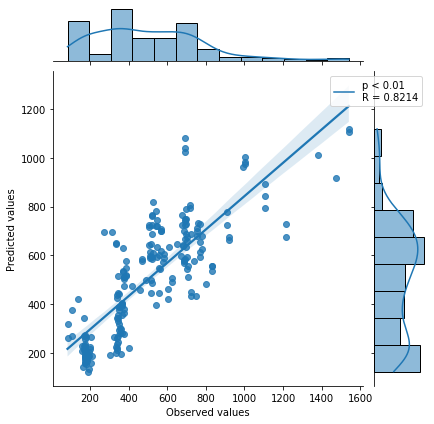

In [ ]:
col1_obt = 0
col2_prev = 1
pear_pos_menor_erro = stats(df[df.columns[col1_obt]], df[df.columns[col2_prev]])
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(15,15))
sns.jointplot(
    x=df.columns[col1_obt],
    y=df.columns[col2_prev],
    kind='reg',
    data=df
)


# plt.legend([
#     'p = ' + str(round(pear_pos[1], 5)) + '\nR = ' + str(round(pear_pos[0], 5))])
if pear_pos_menor_erro[1] < 0.01:
  plt.legend(['p < ' + '0.01' + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e relse:
else: 
  plt.legend(['p = ' + str(pear_pos_menor_erro[1]) + '\nR = ' + str(round(pear_pos_menor_erro[0], 4))]) #calculando p e r